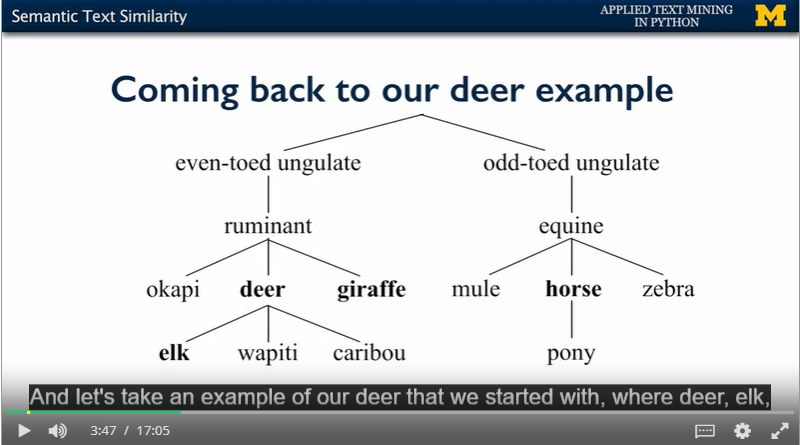

In [1]:
from IPython.display import Image
Image(r"C:\Users\Lenovo\da.png")

You have a dummy root that is on top of all words of the same part of speech. So noun has a dummy root. A verb has a dummy root. And then, there are many semantic similarity measures that are using this hierarchy, in some way. For example, you have different hierarchies for this part of speech. 

**Path Similarity**


And let's take an example of our deer that we started with, where deer, elk, giraffe, horse and so on, these words are grouped together, in some form, in this hierarchy. For example, elk, wapiti, and caribou are all types of deer. Deer and giraffe are siblings in this tree hierarchy because they are ruminants, and so on. And horse's related but not in the same hierarchy. It's related because horse and deer are ungulates, but they are not siblings, for example. So one such measure of using this hierarchy for defining semantic similarity is path similarity. You could imagine that you would start with one of these concepts, and see how many steps you need to take to get to the other. In other words, you are finding a shortest path between these two concepts in this hierarchy. And then, similarity can be just measured as inversely related to this distance that we computed. For example, if you have deer and elk, you would have, the deer and elk, actually are, have a parent-child relationship in this case, so the distance is one, while deer and let's take in another color, deer and giraffe is the sense of two, because you need to go up ruminant and down giraffe, so you have a distance of two. In general, you can see that when we computed with paths you use this one, distance of one between deer and elk and say, it's one over the distance plus one, so one over two that's .5. The distance between a deer and giraffe is one over three, so that's, 0.33 and if you just measure the same way, going from deer to horse you'd say it's one, two, three, four, five, six. It's one over seven and that would be 0.14. 

In [2]:
import nltk

In [3]:
from nltk.corpus import wordnet as wn

In [4]:
deer = wn.synset('deer.n.01')  # it means that give me synset of deer which is a noun and give me first sense 
elk = wn.synset('elk.n.01')

In [5]:
deer.path_similarity(elk)

0.5

In [6]:
horse = wn.synset('horse.n.01')

In [7]:
deer.path_similarity(horse)

0.14285714285714285

**Lin Similarity:**

Return a score denoting how similar two word senses are, based on the Information Content (IC) of the Least Common Subsumer (most specific ancestor node) and that of the two input Synsets. The relationship is given by the equation 2 * IC(lcs) / (IC(s1) + IC(s2)).

or

2 * $\log{P(LCS(u,v))}$/($\log{P(u)}$+$\log{P(v)}$)

In [8]:
from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat')

In [9]:
deer.lin_similarity(elk, brown_ic)

0.8623778273893673

In [10]:
deer.lin_similarity(horse, brown_ic)

0.7726998936065773

The Lin similarity is 0.77 for deer and horse and it's 0.86 for deer and elk. And you'll notice especially here, that this is not using the distance between two concepts explicitly. So deer and horse, that were very far away in the WordNet hierarchy still get the higher significance and higher similarity between them. And that is because, in typical contexts and the information that is contained by these words deer and horse, you have deer and horse are enough closer in similarity because they are both basically mammals. But Elk is a very specific instance of deer and not necessarily, in the particular Lin similarity doesn't come out as close

# Distributional similarity and Collocations.

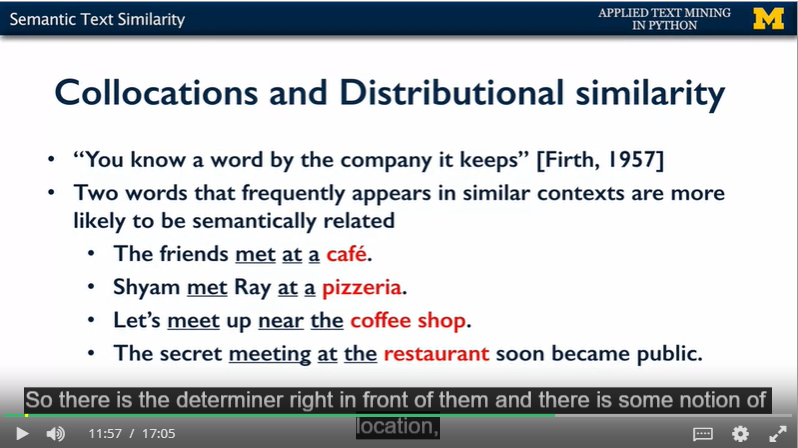

In [11]:
from IPython.display import Image
Image(r"C:\Users\Lenovo\Capture.png")

The other different measure of similarity is using Distributional similarity and Collocations. Collocations can be defined by this code. You know a word by the company it keeps. And that means two words that are frequently appearing in similar concept, in similar contexts are more likely to be similar or more likely to be semantically related. So if you have two words that keep appearing in very similar contexts or that could replace another word in the similar context, and still the meaning remains the same, then they are more likely to be semantically related.

An example is this, in these four sentences you have something about meeting at a place, so friends meet at a cafe or Shyam met Ray at a pizzeria or let's meet up near a coffee shop and so on. These words, cafe or pizzeria or coffee shop or restaurant are semantically related because they typically occur around the words meet, around at, or, near, the. So there is the determiner right in front of them and there is some notion of location, and those are the concepts that would form your context around the word. In general, you would define context based on words before, after, or within a small window of a target word, so word what comes before. For example, for all of these was a cafe and restaurant and so on, it was 'a' or 'the', alright? Because it's a noun and you have a determiner right before that. What comes after or what comes within a small window? Let's say, of size three and you will remember that all of those examples had some form of meet. Met, meet, meeting and so on in that small window of three to five words. You could also use parts of speech as context, so part of speech of words before, after, within a small window. You could say that this particular target word occurs right after a determiner or occurs after location morality, two words and so on. You could have some specific semantic relation to the target word or you could have words that come from the same sentence, in same document, and you can define that document as any length you want. 

# Strength of association between words

Let's say, a passage in a document, a paragraph that would constitute your context. Once you have defined this context you can compute the strength of association between words based on how frequently these words co-worker or how frequently they collocate. That's why it's called Collocations. For example, if you have two words that keep coming next to each other, then you would want to say that they are very highly related to each other. On the other side, if they don't occur together, then they are not necessarily very similar. It's also important to see how frequent individual words are. For example, the word 'the' is so frequent that it would occur with every other word, fairly often. The similarity score would be very high with 'the' just because 'the' itself happens to be very frequent. There is a way in which you can normalize such that this very frequent word does not kind of, super ride all the other similarity measures you find. And one way to do it would be using Pointwise Mutual Information. Pointwise Mutual Information is defined as the log of this ratio of seeing two things together. Seeing the word and the context together, divided by the probability of these occurring independently. What is the chance that you would see the world in the overall corpus? What is the chance that you can see the context word in the overall corpus and what is the chance that they are actually occurring together?

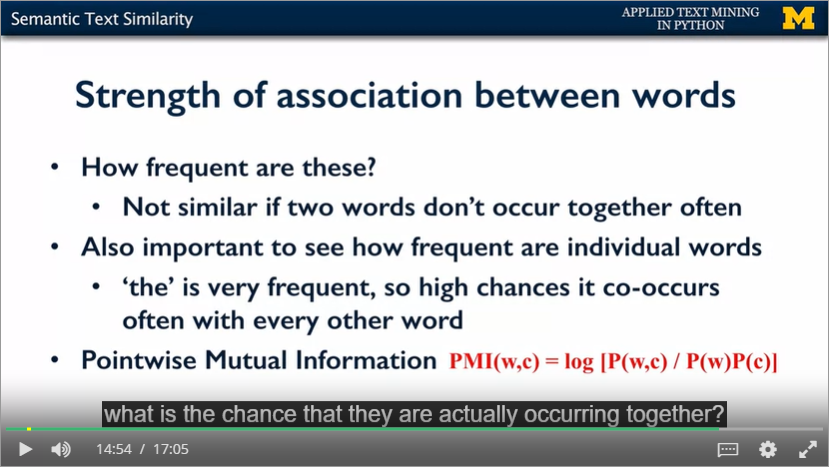

In [12]:
from IPython.display import Image
Image(r"C:\Users\Lenovo\cs.png")

# Topic Modeling

LDA is another such generative model. And the generative model for a document d is you choose the length of document, you first decide what is the length of the document that you are generating. Then you choose a mixture of topics for that document. And then you use that topic's multinomial distribution, that is the word distribution, to output the words to fill up that quota, that topic's quota. Suppose you decide that for a particular document, 40% of the words come from topic A, then you use that topic A's multinomial distribution to output the 40% of the words. This is a very simplistic explanation of LDA